In [27]:
import numpy as np
from sklearn.mixture import GaussianMixture

from sklearn import datasets

import torch

import pickle
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def make_gmm(n_comps, n_dims):
  section_size = n_dims // n_comps
  means = np.zeros((n_comps, n_dims))
  for i in range(n_comps):
    means[i][i*section_size:(i+1)*section_size] = 1
  data = np.zeros((10000,n_dims))
  for i in range(10000):
    data[i] = means[i%n_comps] + np.random.randn(n_dims)*.3
  gmm = GaussianMixture(n_comps)

  return gmm.fit(data)
# gmm = make_gmm(3,3)
# print(f'{np.round(gmm.means_,2)}')
# print(f'{np.round(gmm.weights_,2)}')
# print(f'{np.round(gmm.covariances_,2)}')

In [29]:
# data = datasets.load_digits()['data']

# gmm = GaussianMixture(10, 'full', max_iter=50000)

# gmm = gmm.fit(data)

# samples = gmm.sample(10)


In [30]:
# samples[0][0].shape
# for i in range(10):
#   plt.imshow(samples[0][i].reshape((8,8)), cmap='gray')
#   plt.title(samples[1][i])
#   plt.show()


In [31]:
# for i in range(10):
#   digit = gmm.means_[i]
#   plt.imshow(digit.reshape((8,8)), cmap='gray')
#   plt.show()

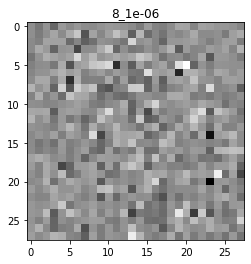

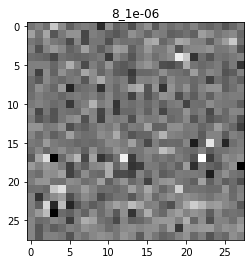

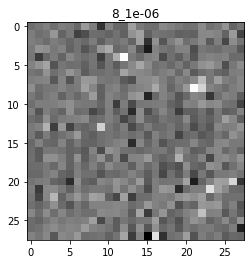

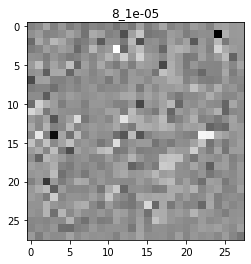

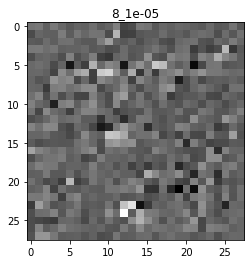

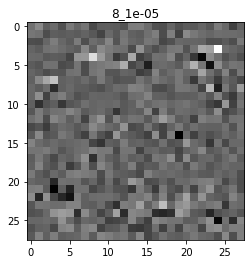

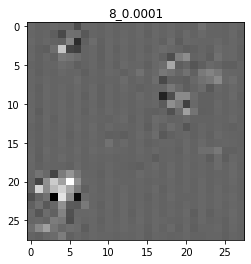

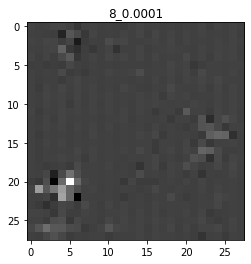

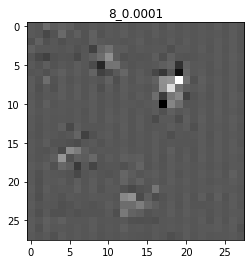

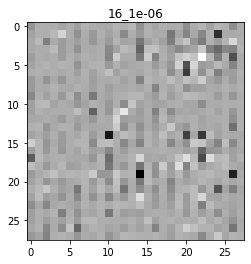

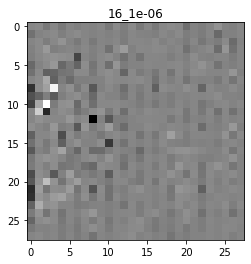

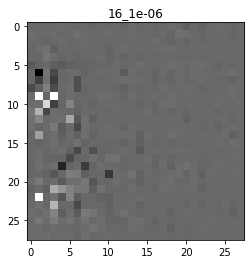

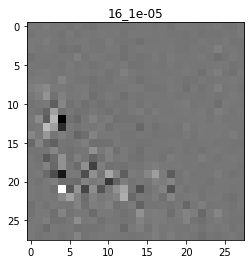

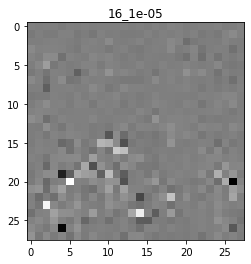

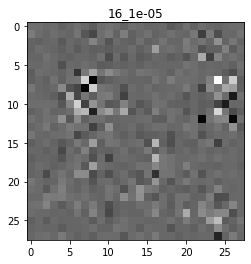

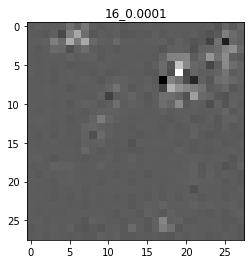

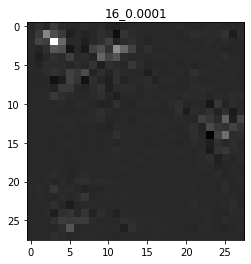

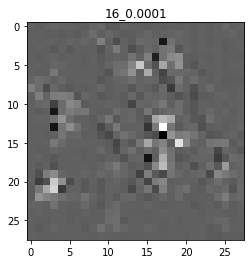

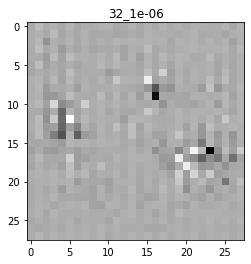

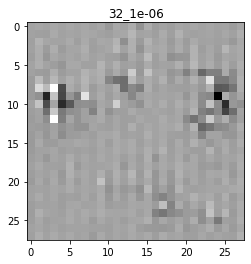

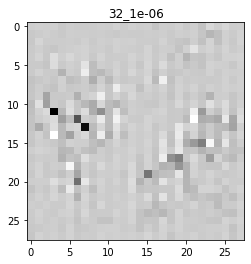

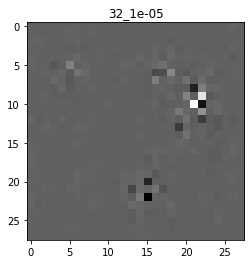

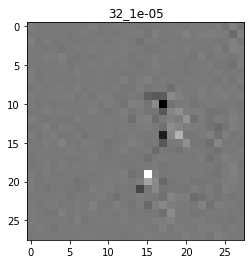

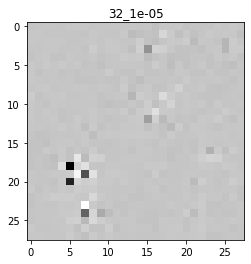

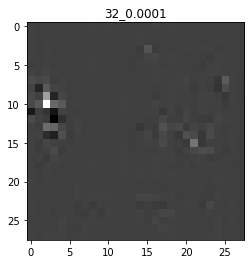

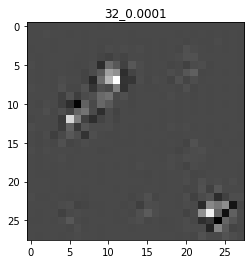

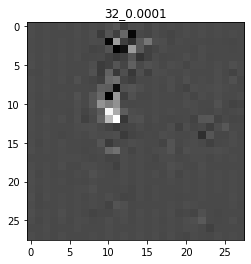

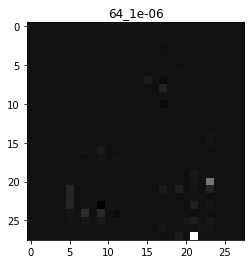

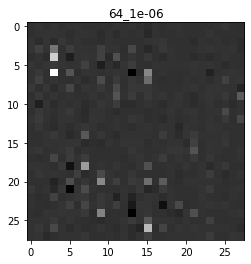

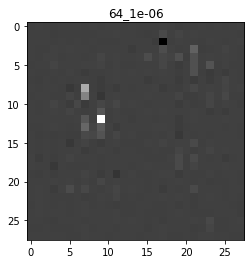

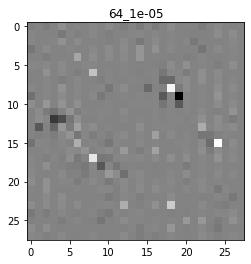

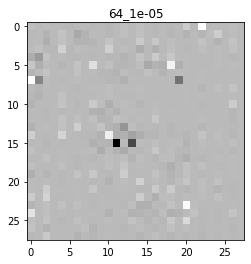

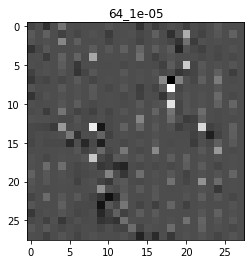

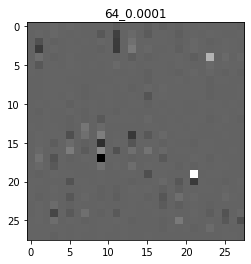

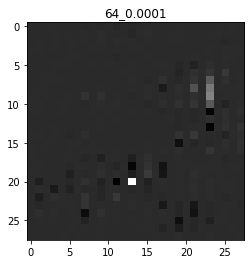

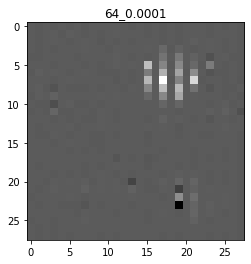

In [32]:
for size in [8,16,32,64]:
    for lr in ['1e-06', '1e-05', '0.0001']:
        with open(f'chkpt/mnist_gmm_rand_samples_{size}_{lr}.pickle','rb') as in_file:
            samples = pickle.load(in_file)['sample']
        for sample in samples[:3]:
            plt.imshow(sample[0], cmap='gray')
            plt.title(f'{size}_{lr}')
            plt.show()

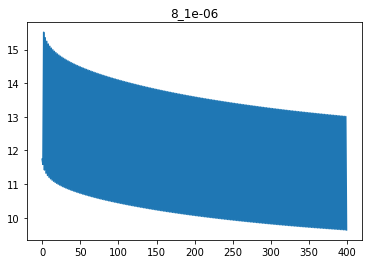

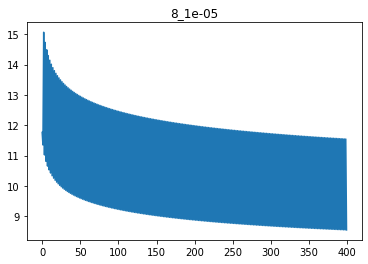

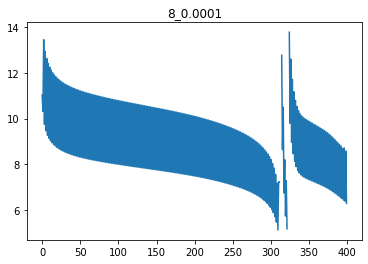

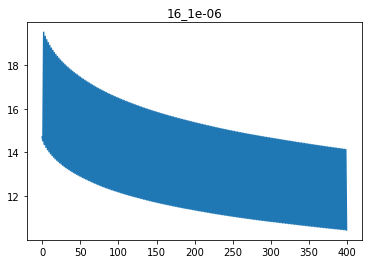

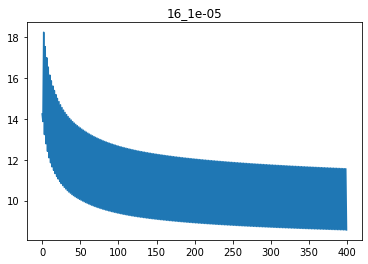

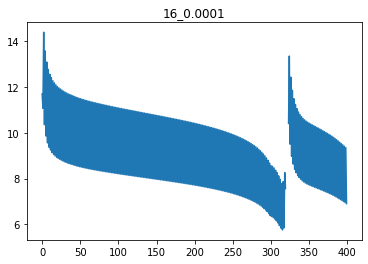

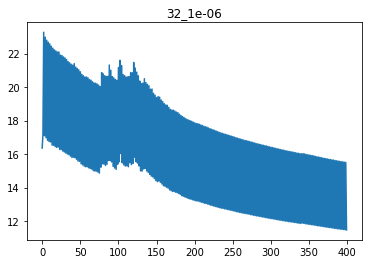

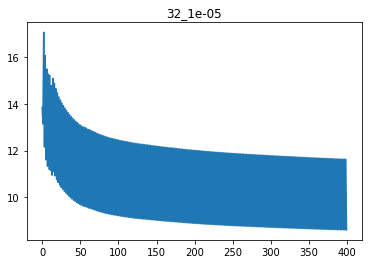

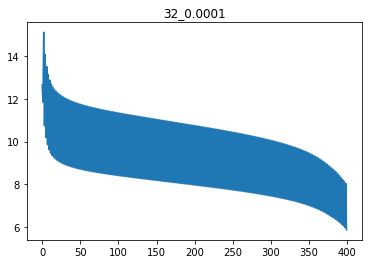

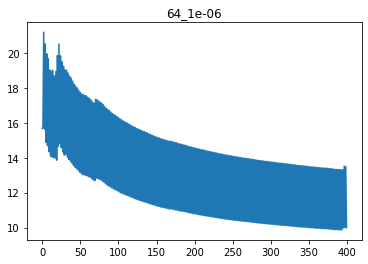

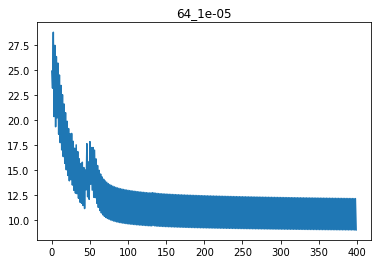

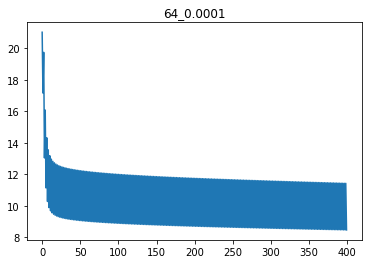

In [33]:
for size in [8,16,32,64]:
    for lr in ['1e-06', '1e-05', '0.0001']:
        with open(f'chkpt/mnist_gmm_rand_samples_{size}_{lr}.pickle','rb') as in_file:
            losses = np.array(pickle.load(in_file)['losses'])
        plt.plot(losses)
        plt.title(f'{size}_{lr}')
        plt.show()

In [34]:
from acflow import RealNVP
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = RealNVP(
        1, 5, 64, 10, (1,28,28), device, 10
      ).to(device)
  
model.load_state_dict(torch.load('chkpt/mnist_gmm_rand_64_1e-06.tar')['model_state_dict'])
sum(p.numel() for p in model.parameters())

346624

In [35]:
model.means

Parameter containing:
tensor([[ 0.4090,  0.1115,  0.0129,  ..., -0.6409,  0.1662, -0.0920],
        [-0.1125, -0.5677,  0.7724,  ...,  0.6406,  2.1781,  0.6578],
        [-0.8698,  0.2399, -0.3846,  ..., -0.3570, -0.6103,  1.6777],
        ...,
        [-0.8558,  2.3226,  0.4163,  ...,  0.1210,  1.3609, -0.2020],
        [-0.6566, -0.3749,  0.0717,  ..., -0.3503,  0.9436, -0.0946],
        [ 0.9611,  0.2333,  0.4027,  ...,  0.4461,  1.0545, -0.6163]],
       device='cuda:0', requires_grad=True)

In [36]:
model.covs

Parameter containing:
tensor([[0.0161, 0.7585, 0.3270,  ..., 0.9601, 0.5532, 0.6089],
        [0.8103, 0.1227, 0.3709,  ..., 0.0643, 0.5403, 0.2210],
        [0.8872, 0.8594, 0.7338,  ..., 0.5157, 0.2422, 0.9035],
        ...,
        [0.2791, 0.0932, 0.9228,  ..., 0.8123, 0.7779, 0.8545],
        [0.2233, 0.6460, 0.0302,  ..., 0.5995, 0.0772, 0.7337],
        [0.2482, 0.2522, 0.0920,  ..., 0.9208, 0.0970, 0.1915]],
       device='cuda:0', requires_grad=True)